In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = r'C:\Users\prashant\Downloads\premiums.xlsx'
df = pd.read_excel(url)
df.head(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [79]:
print(df.columns)
df['Income_Level'].unique()

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')


array(['<10L', '10L - 25L', '> 40L', '25L - 40L', nan], dtype=object)

In [80]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


### Handling of NA VALUES


In [81]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [82]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [83]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [84]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [85]:
print("the total raw and column is :", df[df['number_of_dependants']<0].shape)
print("the range of minus values for this is :" , df[df['number_of_dependants']<0]['number_of_dependants'].unique())

the total raw and column is : (72, 13)
the range of minus values for this is : [-3 -1]


In [86]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [87]:
##checking the numeric columns
numeric_columns = df.select_dtypes(['float64', 'int64']).columns

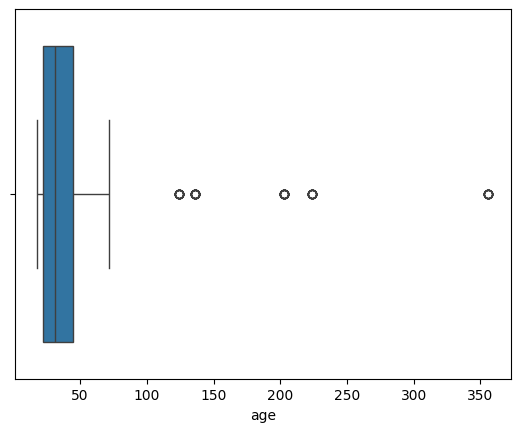

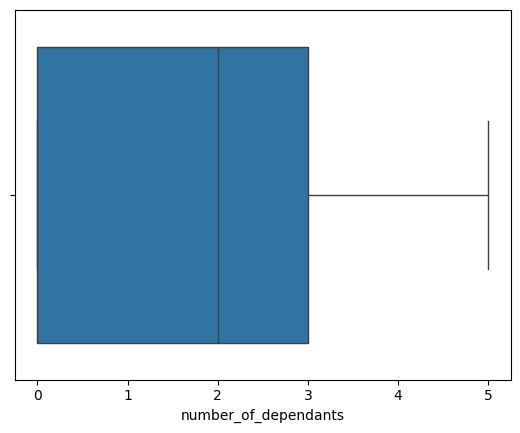

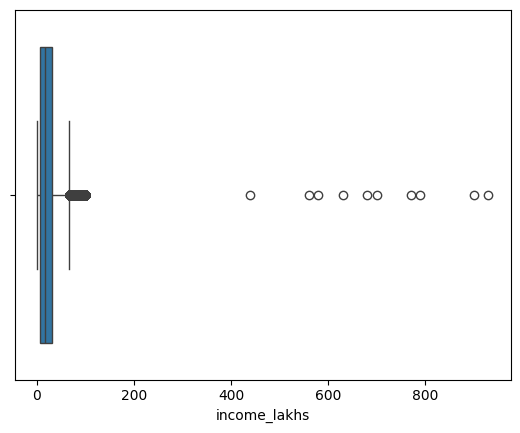

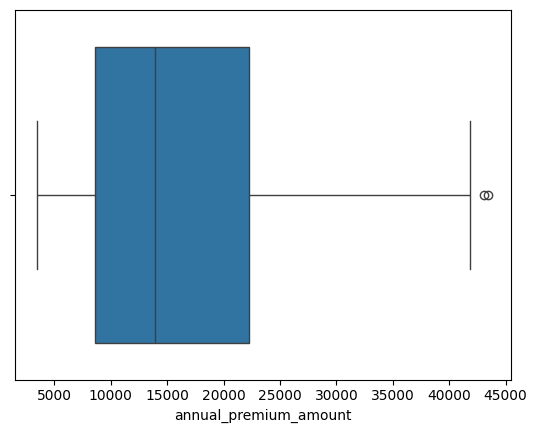

In [88]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [89]:
df1 = df[df['age']<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


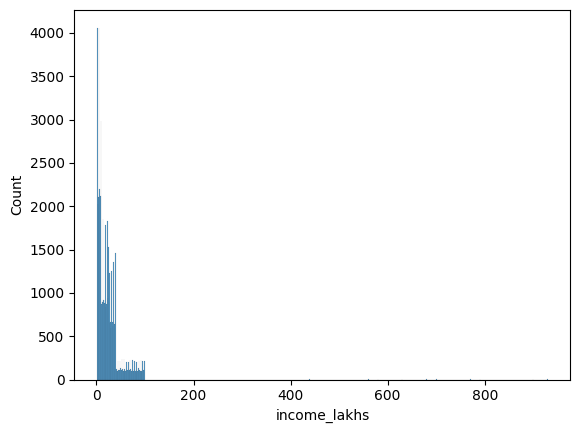

In [90]:
sns.histplot(df.income_lakhs)
plt.show()

In [91]:
df1.income_lakhs.quantile([0.25, 0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [92]:
def get_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    higher_bound = Q3 + 1.5 * IQR
    return lower_bound, higher_bound

In [93]:
get_iqr_bounds(df1['income_lakhs'])

(-29.0, 67.0)

In [94]:
df1.income_lakhs.quantile(0.999)

np.float64(100.0)

In [95]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [96]:
df2 = df1[df1.income_lakhs<=quantile_thresold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


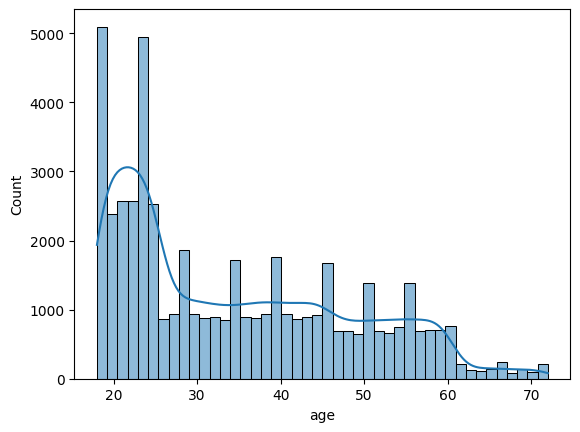

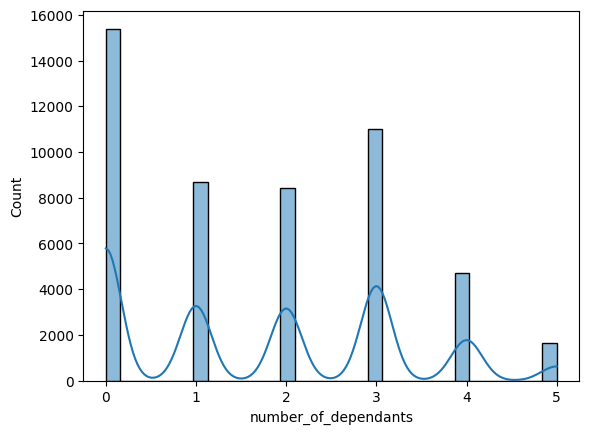

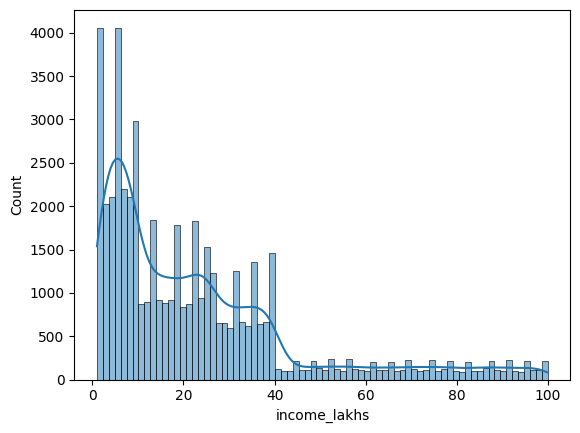

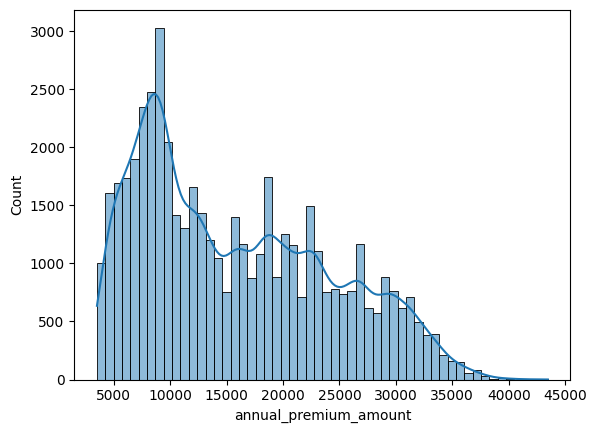

In [97]:
for col in numeric_columns:
    sns.histplot(df2[col], kde=True)
    plt.show()

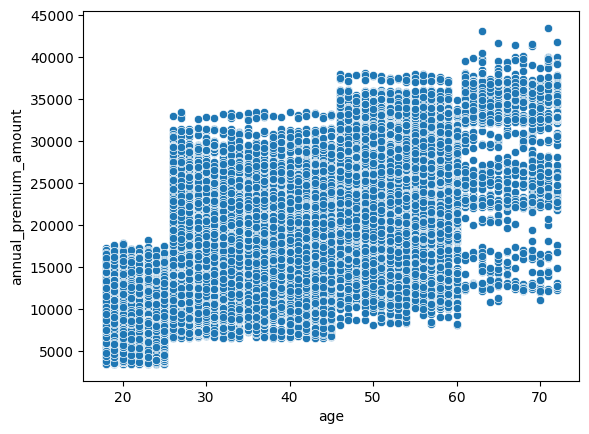

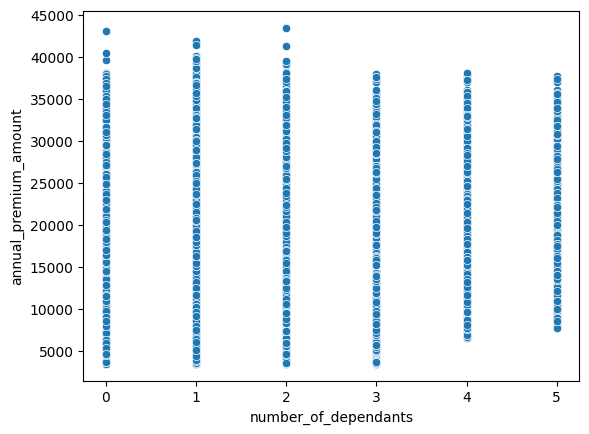

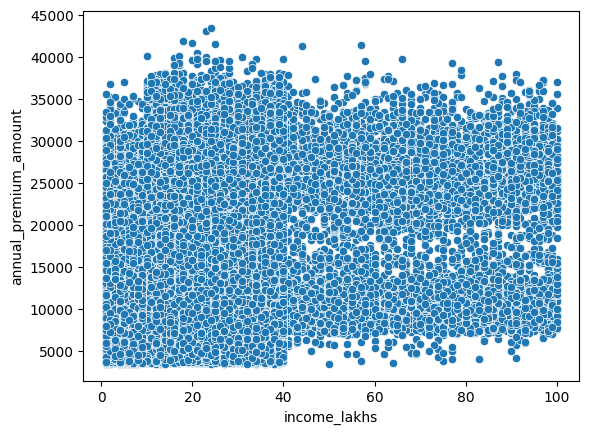

In [98]:
numeric_features = ['age', 'number_of_dependants', 'income_lakhs'] 

for col in numeric_features:
    sns.scatterplot(x=df2[col], y=df2['annual_premium_amount'])
    plt.show()

In [99]:
categorical_columns =  df.select_dtypes(['object', 'category']).columns
categorical_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [100]:
for col in categorical_columns:
    print(col, ":", df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [101]:
df2['smoking_status'].replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
     'Not Smoking' : 'No Smoking'
}, inplace=True)
df2['smoking_status'].unique()

C:\Users\prashant\AppData\Local\Temp\ipykernel_8328\2762202947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [102]:

def get_pct_count(col):
        pct_count = df2[col].value_counts(normalize=True)
        pct_count_names = pct_count.index
        pct_count_values = pct_count.values
        return pct_count, pct_count_names, pct_count_values


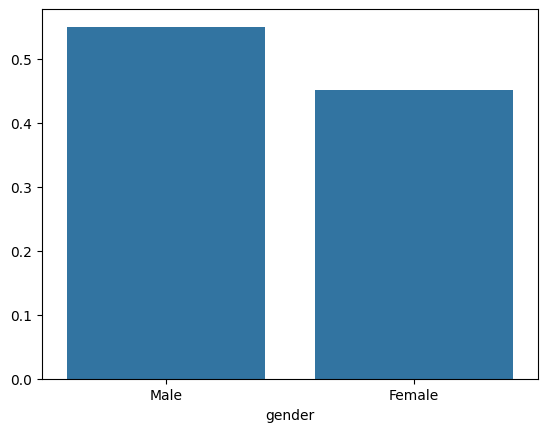

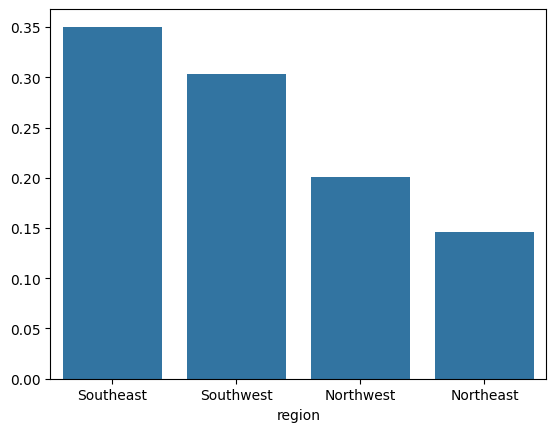

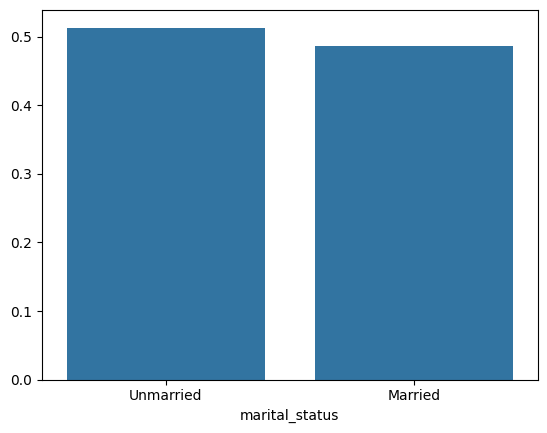

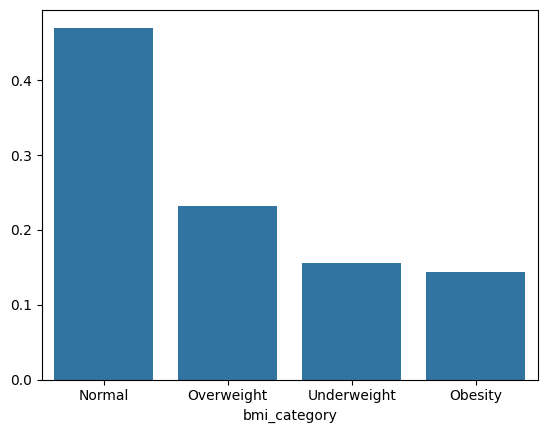

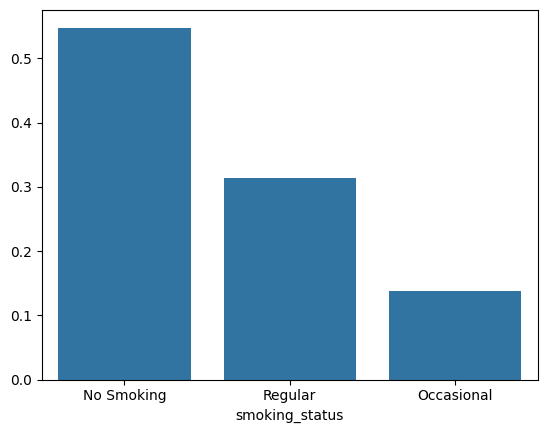

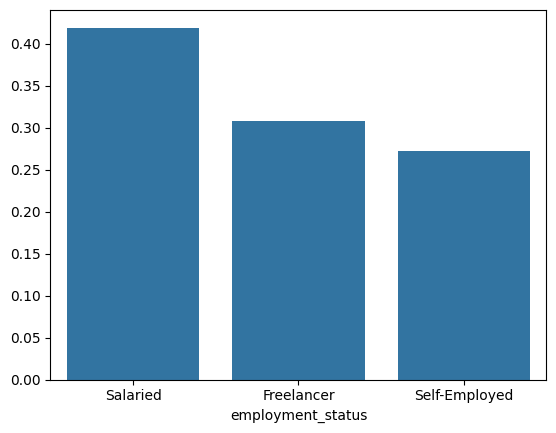

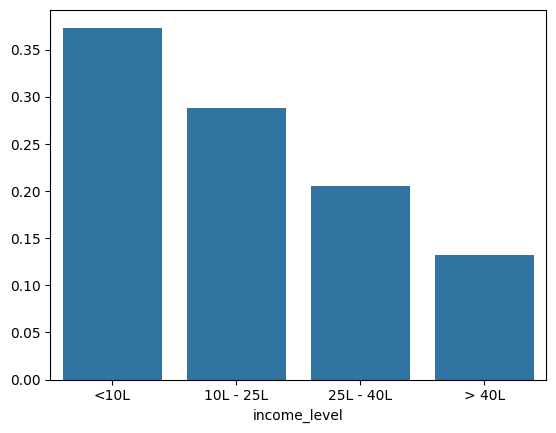

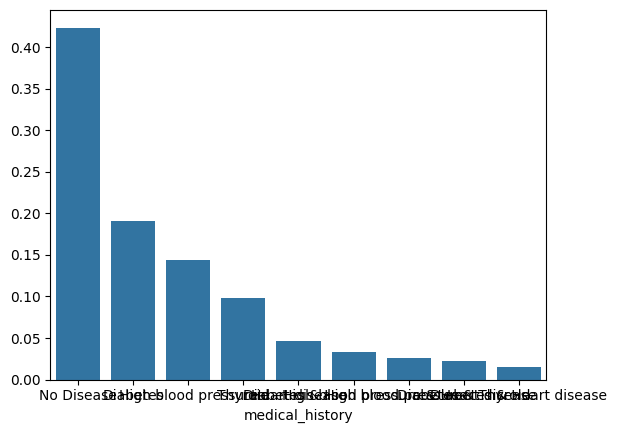

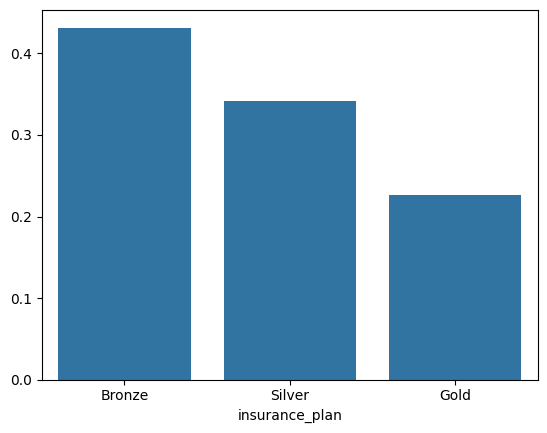

In [103]:
for col in categorical_columns:
    pct_count, pct_names, pct_values = get_pct_count(col)

    sns.barplot(x=pct_names, y=pct_values)
    plt.show()

In [104]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


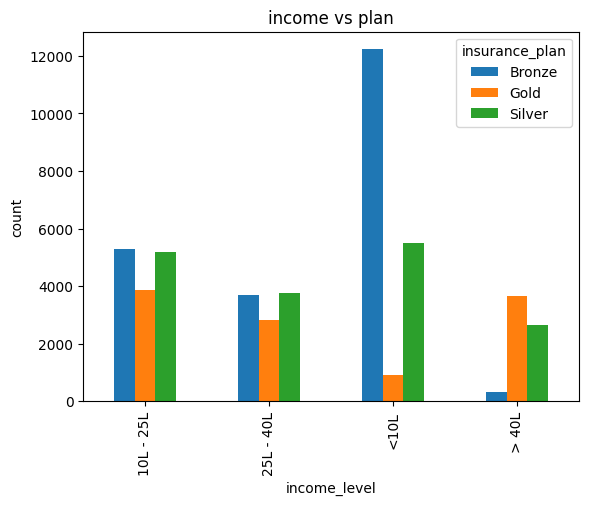

In [105]:
crosstab.plot(kind='bar')
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

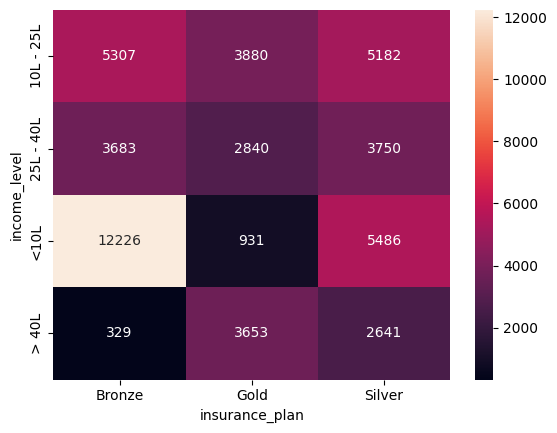

In [106]:
sns.heatmap(crosstab, annot=True, fmt='d')

In [107]:
##doing feature engineering

In [108]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [109]:
risk_scores = {
    'diabetes' : 6,
    'high blood pressure' : 6,
    'thyroid' : 5,
    'no disease' : 0,
    'none' : 0,
    'heart disease' : 8
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None


In [110]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)   
df2.head(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [111]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [112]:
df2['insurance_plan'] = df2['insurance_plan'].replace({'Bronze' : 1, 'Silver' : 2, 'Gold' : 3})
df2.head(3)

C:\Users\prashant\AppData\Local\Temp\ipykernel_8328\4240864295.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['insurance_plan'] = df2['insurance_plan'].replace({'Bronze' : 1, 'Silver' : 2, 'Gold' : 3})


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


In [113]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [114]:
df2['income_level'] = df2['income_level'].replace({'<10L' : 1, '10L - 25L' : 2, '> 40L' : 3, '25L - 40L' : 3, '> 40L' : 4})

C:\Users\prashant\AppData\Local\Temp\ipykernel_8328\467988440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['income_level'] = df2['income_level'].replace({'<10L' : 1, '10L - 25L' : 2, '> 40L' : 3, '25L - 40L' : 3, '> 40L' : 4})


In [115]:

nominal_columns = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_columns, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1


In [116]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head(3)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1


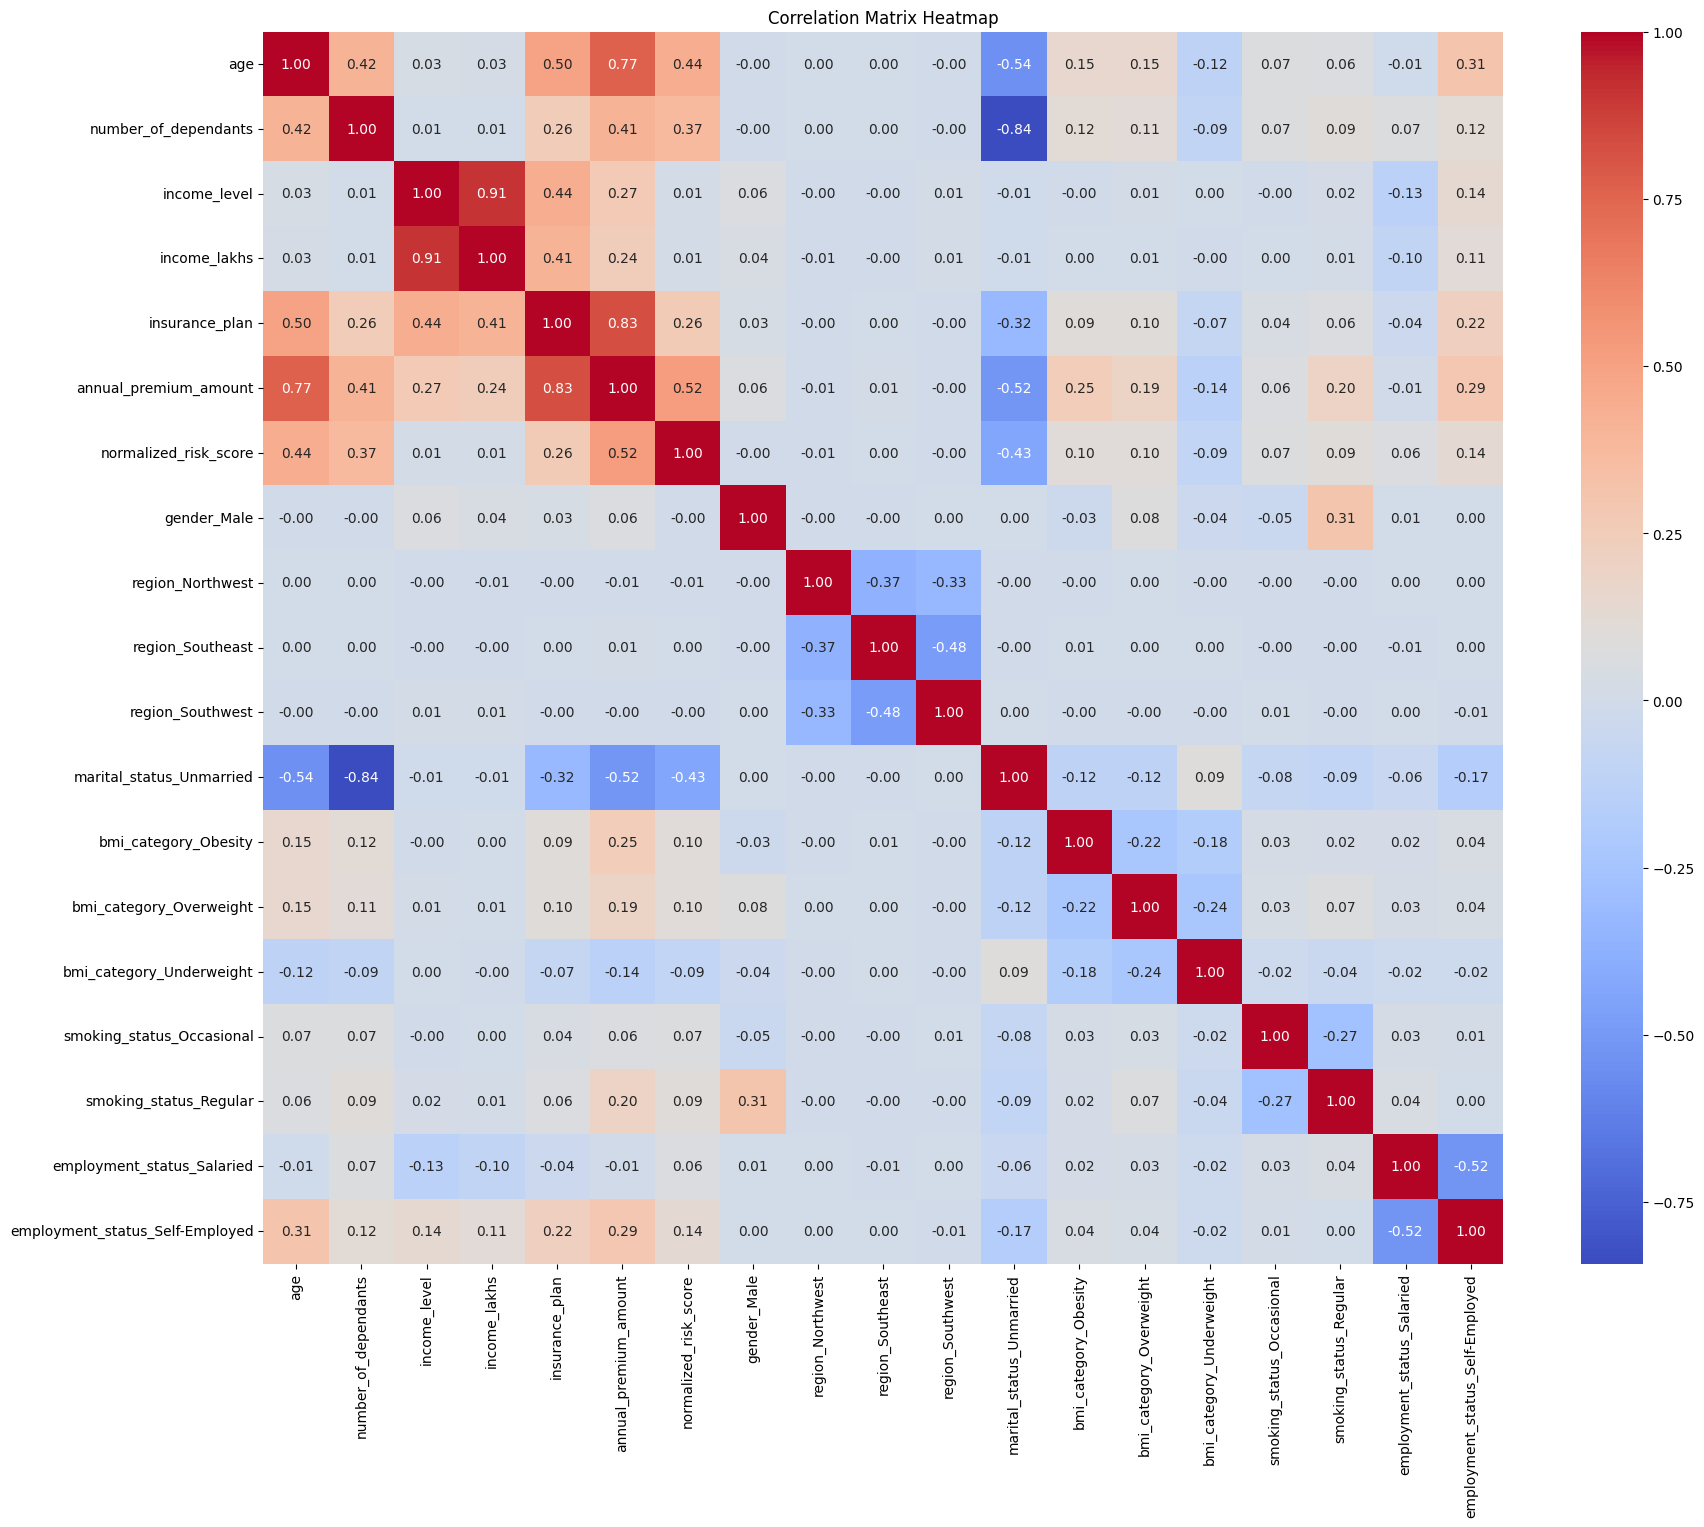

In [117]:
cm = df4.corr(numeric_only=True)  # Correlation matrix

plt.figure(figsize=(20, 16))  
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=90)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [118]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [120]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [121]:
X= X.drop('income_level', axis=1)
calculate_vif(X)


,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [122]:
X_reduced = X
X_reduced.head()


,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


## MODEL TRAINING


In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print("x_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)



x_train :  (34935, 17)
X_test :  (14973, 17)
y_train :  (34935,)
y_test :  (14973,)


In [124]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("train_score : ", train_score)
print("test_score : ", test_score)


train_score :  0.9280957176093705
test_score :  0.9283765993531428


In [125]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_predict = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_predict)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE : ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE :  5056639.130347775 RMSE:  2248.6972073509087


In [126]:
X_test.head(1)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
24098,0.351852,0.6,0.010101,0.0,0.428571,0,1,0,0,0,0,0,0,0,0,1,0


In [127]:
model.intercept_

np.float64(4701.438053965809)

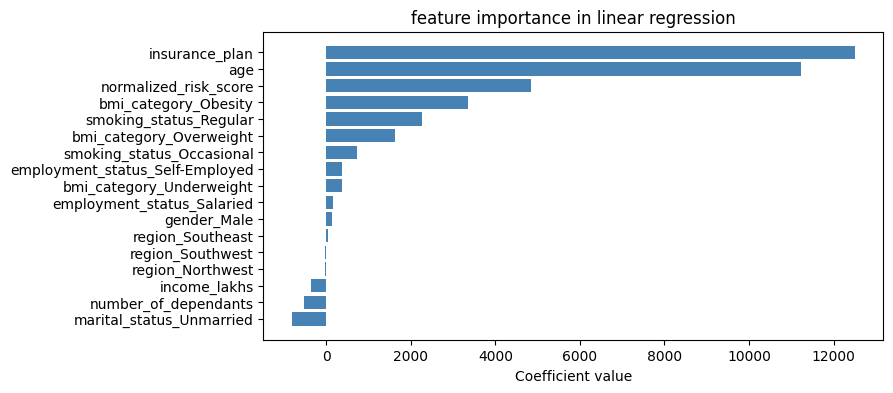

In [128]:
feature_importances = model.coef_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient value')
plt.title('feature importance in linear regression')
plt.show()



## Trying different model to increase the accuracy

In [129]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
print("train_score : ", train_score)
print("test_score : ", test_score)


train_score :  0.9861041903495789
test_score :  0.9807721972465515


In [130]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_predict = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_predict)
rmse_lr = np.sqrt(mse_lr)
print("XGBOOST Regression ==> MSE : ", mse_lr, "RMSE: ", rmse_lr)

XGBOOST Regression ==> MSE :  1357488.75 RMSE:  1165.1131919260033


In [131]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()

param_grid = {
    'n_estimators' : [20, 40, 50],
    'learning_rate' : [0.01, 0.1, 0.2],
    'max_depth' : [3, 4, 5]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_score_


np.float64(0.9810737768809)

In [132]:
random_search.best_params_


{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [133]:
best_model = random_search.best_estimator_

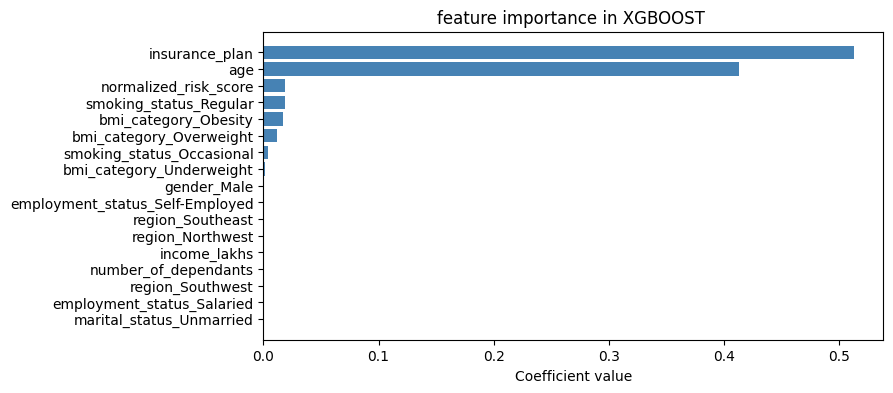

In [134]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, index=X_test.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient value')
plt.title('feature importance in XGBOOST ')
plt.show()



## Error Analysis

In [135]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test 
residuals_pct = residuals * 100/y_test

results_df = pd.DataFrame({
    'actual' : y_test,
    'predicted' : y_pred,
    'diff' : residuals,
    'diff_pct' : residuals_pct
})

results_df.head(2)

,actual,predicted,diff,diff_pct
24098,9246,9547.453125,301.453125,3.260363
201,11664,13488.259766,1824.259766,15.640087


<Axes: xlabel='diff_pct', ylabel='Count'>

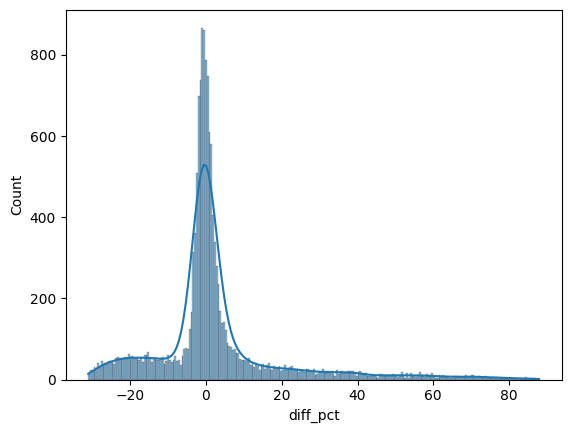

In [136]:
sns.histplot(results_df['diff_pct'], kde=True)

In [137]:
extreme_error_thresold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_thresold]
print('the number of raw and columns which have  more than 10 percent errors are :', extreme_results_df.shape)

the number of raw and columns which have  more than 10 percent errors are : (4466, 4)


In [138]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]

extreme_error_pct

29.827021972884527

In [139]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct
25207,3501,6578.916016,3077.916016,87.915339
29904,3503,6578.916016,3075.916016,87.808051
48801,3516,6578.916016,3062.916016,87.113652
10288,3517,6578.916016,3061.916016,87.060450
23975,3520,6578.916016,3058.916016,86.901023
...,...,...,...,...
17089,4960,7456.396484,2496.396484,50.330574
14376,4887,7345.736816,2458.736816,50.311783
4067,4846,7276.824707,2430.824707,50.161467
23368,4360,6544.921875,2184.921875,50.112887


In [140]:
X_test.index

Index([24098,   201, 25471, 32500, 30832, 11631, 12814, 33373,  5408, 47939,
       ...
        7746, 25417,  8104, 11125,   679, 12123, 31891,  6713, 16957, 15109],
      dtype='int64', length=14973)

In [141]:
extreme_results_df.index

Index([  201, 25471, 47939, 26239, 16907, 16861,  5849, 25369,  8403, 38677,
       ...
       39176, 23789, 24121,  4068, 41535, 21893, 37321, 43822, 24771,  7746],
      dtype='int64', length=4466)

In [142]:
extreme_error_df = X_test.loc[extreme_results_df.index]
print('the following records are showing the high erros :')
extreme_error_df

the following records are showing the high erros :


,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,0.129630,0.4,0.242424,0.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0
37321,0.018519,0.4,0.171717,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
43822,0.111111,0.2,0.020202,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0
24771,0.425926,0.6,0.313131,0.5,0.0,0,0,1,0,0,0,0,0,0,0,0,0


In [143]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

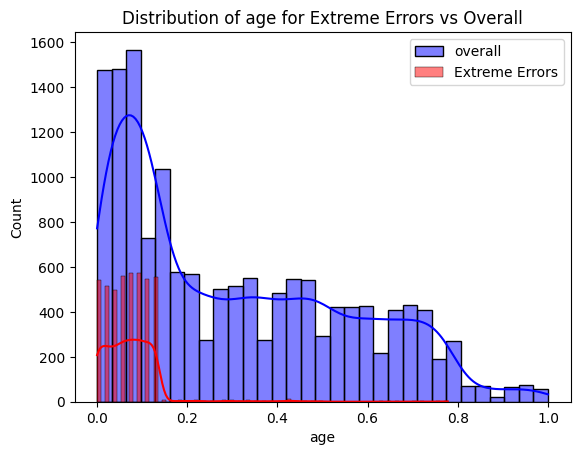

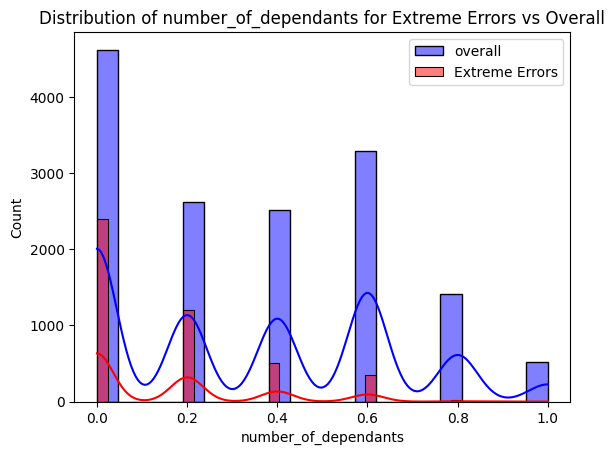

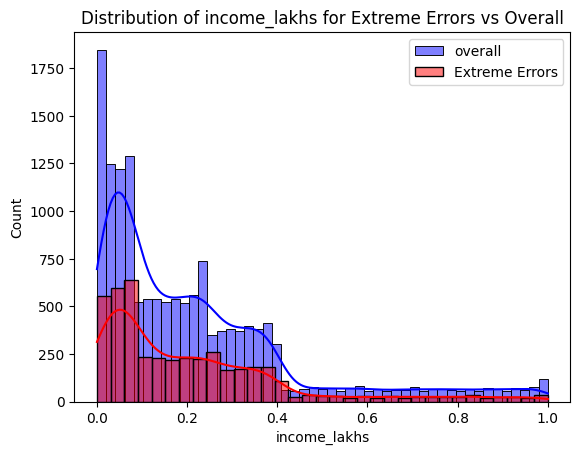

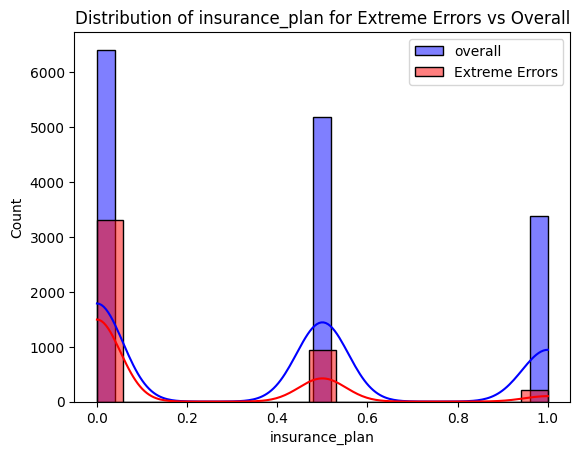

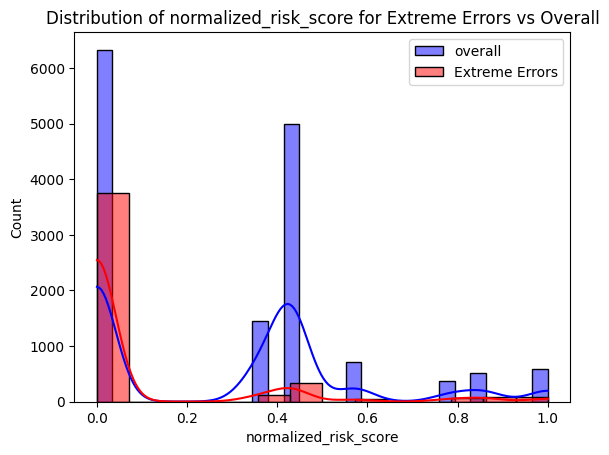

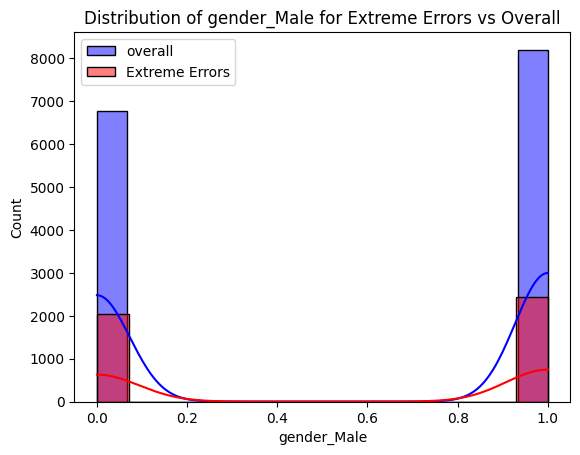

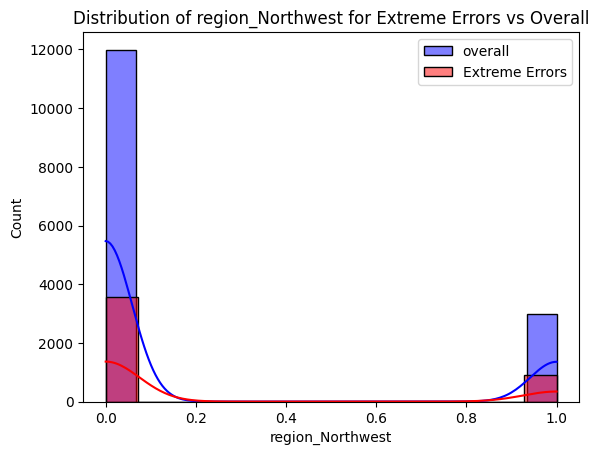

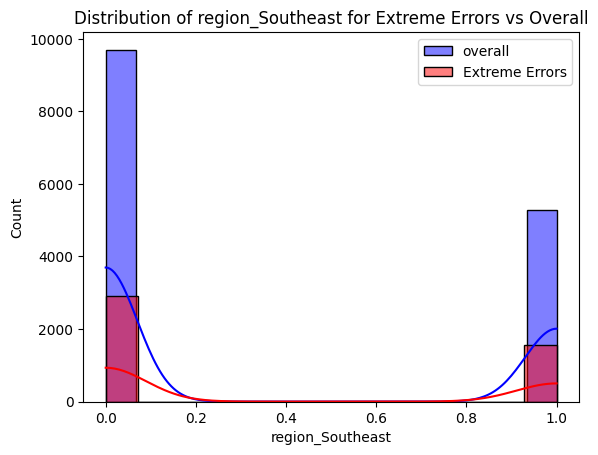

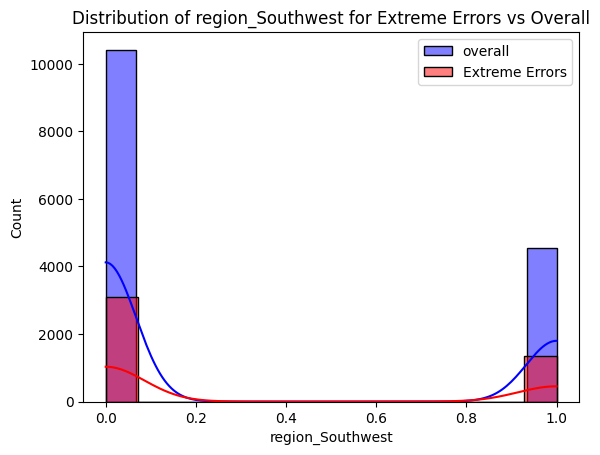

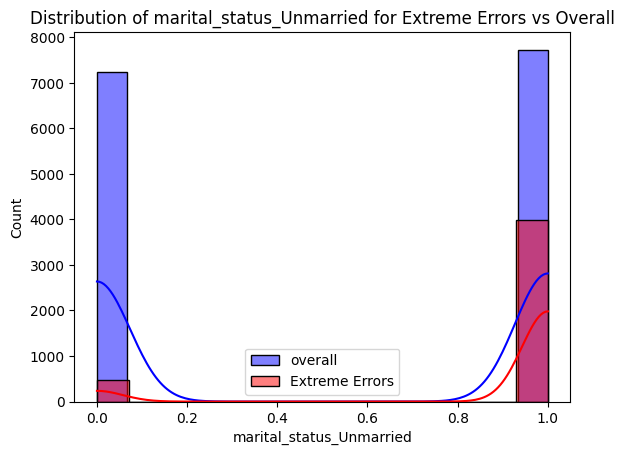

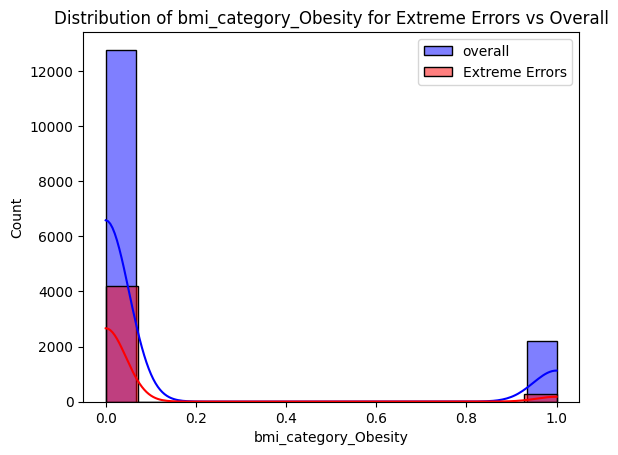

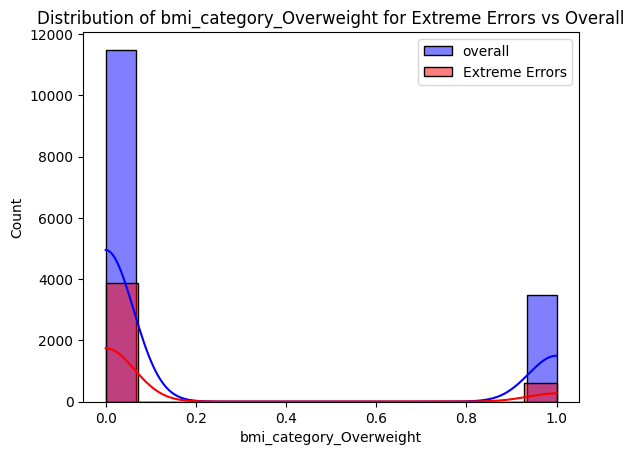

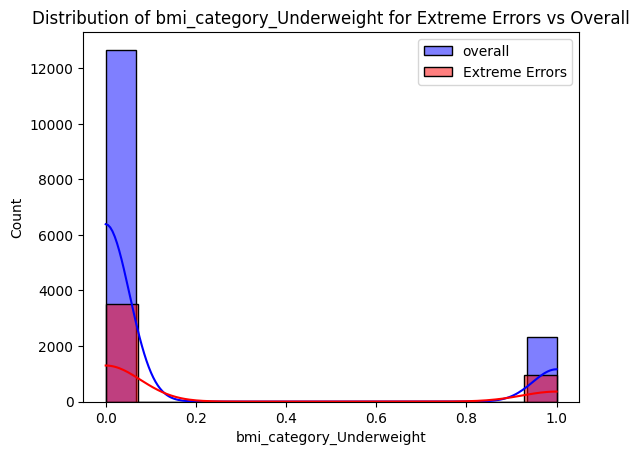

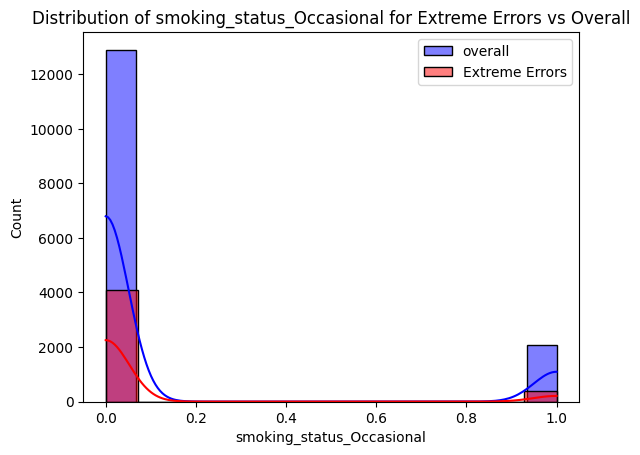

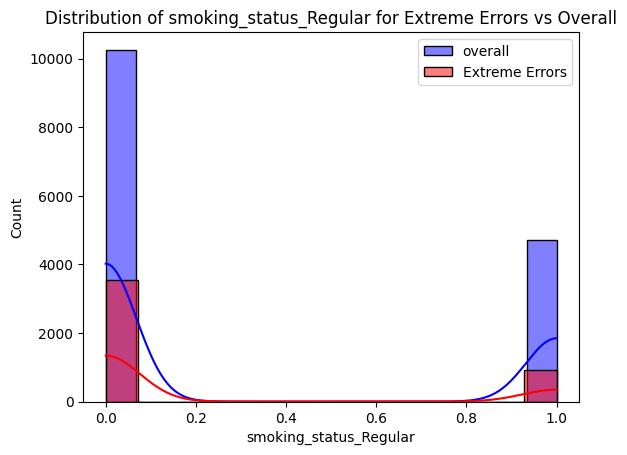

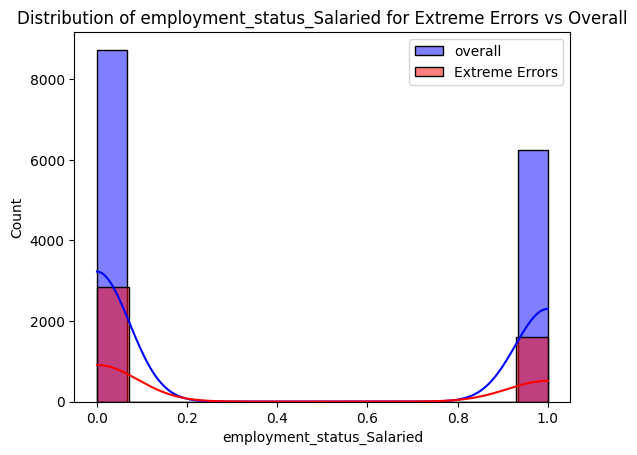

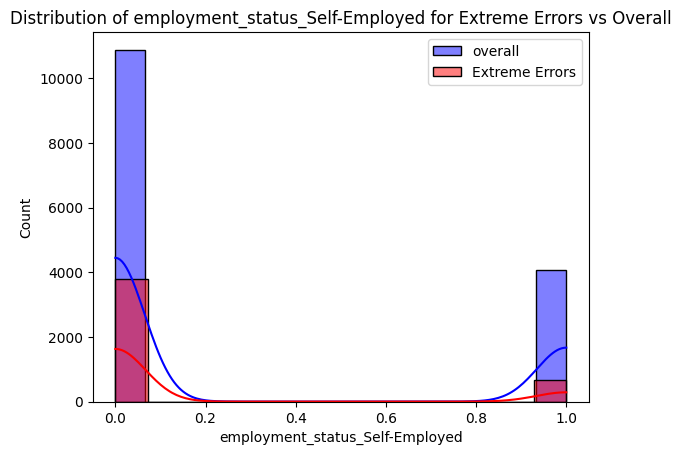

In [144]:

for feature in X_test.columns:
    sns.histplot(X_test[feature], label='overall', color='blue', alpha=0.5, kde=True)
    sns.histplot(extreme_error_df[feature], label='Extreme Errors', color='red', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

In [145]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_level',
 'income_lakhs',
 'insurance_plan']

In [146]:
extreme_error_df.columns ## in this income level column is not here because we removed it earlier for vif.but for now we will introduce it again

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [147]:
##we do not care about income level but while doing reverse feature engineering to get df in original shape we are just adding this column 

extreme_error_df['income_level'] = -1

In [148]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,1.0,-2.0,64.0,3.0
1,22.0,0.0,-2.0,2.0,1.0
2,24.0,0.0,-2.0,43.0,3.0
3,20.0,0.0,-2.0,30.0,1.0
4,24.0,0.0,-2.0,61.0,2.0
...,...,...,...,...,...
4461,25.0,2.0,-2.0,25.0,1.0
4462,19.0,2.0,-2.0,18.0,1.0
4463,24.0,1.0,-2.0,3.0,1.0
4464,41.0,3.0,-2.0,32.0,2.0


<Axes: xlabel='age', ylabel='Count'>

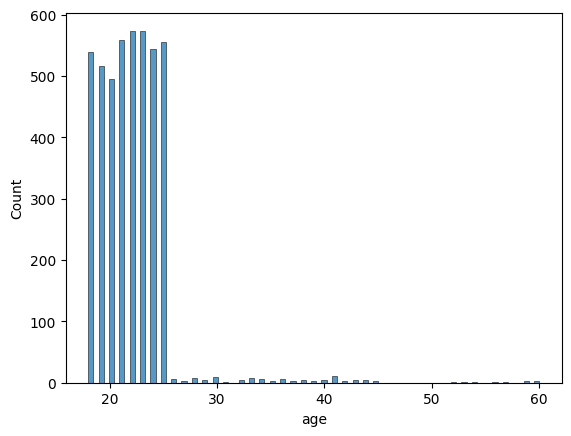

In [149]:
sns.histplot(df_reversed['age'])

In [150]:
df_reversed['age'].quantile(0.97)

print(f'so we have 97% of records which have age either { df_reversed['age'].quantile(0.97)} or less then { df_reversed['age'].quantile(0.97)} ' )

so we have 97% of records which have age either 25.0 or less then 25.0 


<h3 style="text-align: center; color: blue;">Conclusion</h3>


During error analysis, we observed that errors are higher in the age group of 25 and below compared to those above 25. Therefore, we will separate these two groups and build dedicated models for each segment.
